In [256]:
from statsmodels.distributions.empirical_distribution import ECDF
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
AAPL, MSFT = pd.read_excel('AAPL.xlsx'), pd.read_excel('MSFT.xlsx')
AAPL, MSFT = AAPL.drop(columns={'Unnamed: 0'}), MSFT.drop(columns={'Unnamed: 0'})

In [258]:
AAPL.head()

,Date,Close/Last,Growth
0,2017-12-29,42.3075,-0.010814
1,2017-12-28,42.7700,0.002814
2,2017-12-27,42.6500,0.000176
3,2017-12-26,42.6425,-0.025370
4,2017-12-22,43.7525,0.000000


In [259]:
MSFT

,Date,Close/Last,Growth
0,2017-12-29,85.54,-0.002100
1,2017-12-28,85.72,0.000117
2,2017-12-27,85.71,0.003630
3,2017-12-26,85.40,-0.001286
4,2017-12-22,85.51,0.000117
...,...,...,...
246,2017-01-09,62.64,-0.003183
247,2017-01-06,62.84,0.008668
248,2017-01-05,62.30,0.000000
249,2017-01-04,62.30,-0.004474


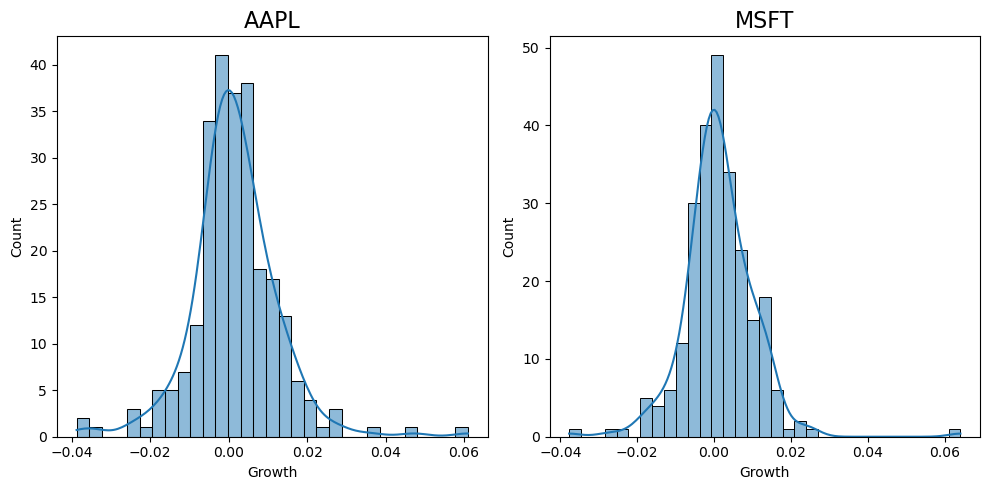

In [260]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=AAPL, x = 'Growth', ax = ax[0], kde=True)
sns.histplot(data=MSFT, x = 'Growth', ax = ax[1], kde=True)
ax[0].set_title('AAPL', fontsize=16)
ax[1].set_title('MSFT', fontsize=16)
fig.tight_layout()
fig.savefig('density.png')

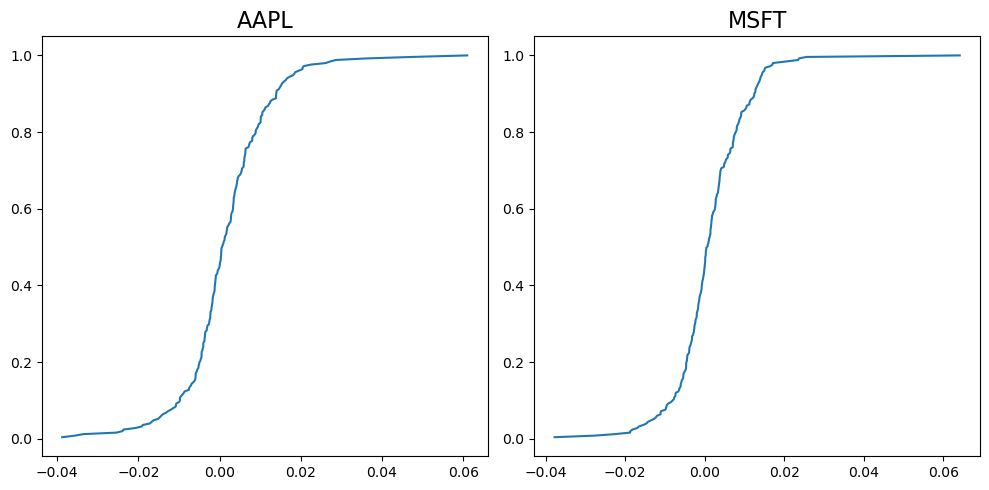

In [261]:
AAPL_distribution = ECDF(AAPL.Growth)
MSFT_distribution = ECDF(MSFT.Growth)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=AAPL_distribution.x, y=AAPL_distribution.y, ax=ax[0])
sns.lineplot(x=MSFT_distribution.x, y=MSFT_distribution.y, ax=ax[1])
ax[0].set_title('AAPL', fontsize=16)
ax[1].set_title('MSFT', fontsize=16)
fig.tight_layout()
fig.savefig('distribution.png')

In [262]:
print(f'Средние занчения доходностей\n============================\nAAPL: {AAPL.Growth.mean()}\nMSFT: {MSFT.Growth.mean()}')

Средние занчения доходностей
AAPL: 0.0015734106847443564
MSFT: 0.0013170885531197355


In [263]:
print(f'Дисперсия доходностей\n============================\nAAPL: {AAPL.Growth.var()}\nMSFT: {MSFT.Growth.var()}')

Дисперсия доходностей
AAPL: 0.00012397919500671295
MSFT: 8.686537874059316e-05


In [264]:
print(f'Ковариация доходностей\n============================\nAAPL: {np.cov(AAPL.Growth)}\nMSFT: {np.cov(MSFT.Growth)}')

Ковариация доходностей
AAPL: 0.0001239791950067129
MSFT: 8.686537874059321e-05


## VaR и cVaR

Value at Risk (VaR). Так как у нас доходность, то VaR считаем следующим образом:

$$ VaR_{\alpha}Y =  q_{1-\alpha} $$

Conditional Value at Risk (cVaR). Так как у нас доходность, то cVaR считаем следующим образом:

$$ cVaR_{\alpha} = \frac{1}{1-\alpha}\int^{q_{1-\alpha}}_{-\infty} t f(t) dt$$

In [265]:
def VaR(distr, q):
    return np.quantile(distr, q=1-q)

In [266]:
def VaR_2(arr, q):
    q = 1-q
    h = (arr.shape[0]+1/4) * q+3/8
    return arr[int(np.floor(h))] + (h - np.floor(h))*(arr[int(np.ceil(h))]-arr[int(np.floor(h))])

In [267]:
def VaR_3(distr, q):
    return distr.quantile(1-q)

In [268]:
AAPL_distribution(0.00022261970932047287)

0.46215139442231074

In [269]:
print('np.quantile:\n============')
print(f'AAPL VaR_0.95: {VaR(AAPL_distribution.x, 0.95)}')
print(f'MSFT VaR_0.95: {VaR(MSFT_distribution.x, 0.95)}')


np.quantile:
AAPL VaR_0.95: -0.01565373169847828
MSFT VaR_0.95: -0.013097452776728299


In [270]:
print('np.quantile (with no ECDF func):\n=================================')
print(f'AAPL VaR_0.95: {VaR(AAPL.Growth.to_numpy(), 0.95)}')
print(f'MSFT VaR_0.95: {VaR(MSFT.Growth.to_numpy(), 0.95)}')


np.quantile (with no ECDF func):
AAPL VaR_0.95: -0.014930371566426567
MSFT VaR_0.95: -0.012497130077381291


In [271]:
print('Сами ищем квантиль\n==================')
print(f'AAPL VaR_0.95: {VaR_2(np.sort(AAPL.Growth.to_numpy()), 0.95)}')
print(f'MSFT VaR_0.95: {VaR_2(np.sort(MSFT.Growth.to_numpy()), 0.95)}')


Сами ищем квантиль
AAPL VaR_0.95: -0.014766591309685941
MSFT VaR_0.95: -0.012292916039646813


In [272]:
print('pandas quantile\n================')
print(f'AAPL VaR_0.95: {VaR_3(AAPL.Growth, 0.95)}')
print(f'MSFT VaR_0.95: {VaR_3(MSFT.Growth, 0.95)}')


pandas quantile
AAPL VaR_0.95: -0.014930371566426567
MSFT VaR_0.95: -0.012497130077381291


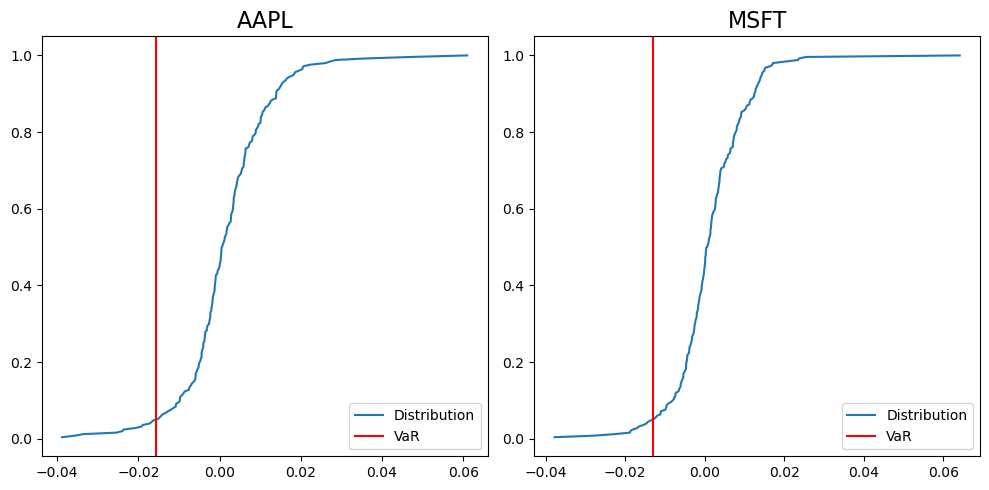

In [273]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=AAPL_distribution.x, y=AAPL_distribution.y, ax=ax[0], label='Distribution')

sns.lineplot(x=MSFT_distribution.x, y=MSFT_distribution.y, ax=ax[1], label='Distribution')
ax[0].axvline(VaR(AAPL_distribution.x, 0.95), color='r', label='VaR')
ax[1].axvline(VaR(MSFT_distribution.x, 0.95), color='r', label='VaR')
ax[0].legend()
ax[1].legend()
ax[0].set_title('AAPL', fontsize=16)
ax[1].set_title('MSFT', fontsize=16)
fig.tight_layout()
fig.savefig('VaR.png')

In [274]:
def cVaR(density, alpha, left, var):
    temp = scipy.integrate.quad(lambda t:density(t)*t, left, var)
    return 1/(1-alpha) * temp[0]

In [284]:
def cVaR_2(arr, alpha):
    var = VaR(arr, alpha)
    arr = arr[arr < var]
    return np.sum(arr)/arr.shape[0]

In [275]:
def AAPL_dens(x):
    AAPL_density_x = np.linspace(-0.04, 0.06, 1000)
    return float(scipy.interpolate.interp1d(AAPL_density_x, scipy.stats.gaussian_kde(AAPL.Growth).evaluate(AAPL_density_x))(x))


def MSFT_dens(x):
    MSFT_density_x = np.linspace(-0.04, 0.06, 1000)
    return float(scipy.interpolate.interp1d(MSFT_density_x, scipy.stats.gaussian_kde(MSFT.Growth).evaluate(MSFT_density_x))(x))


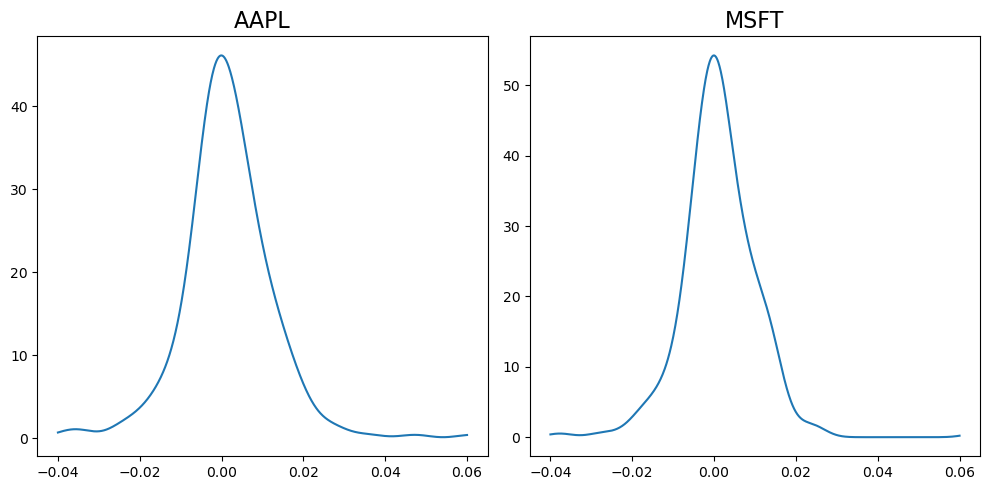

In [276]:
x = np.linspace(-0.04, 0.06, 1000)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=x, y=np.array([AAPL_dens(t) for t in x]), ax=ax[0])
sns.lineplot(x=x, y=np.array([MSFT_dens(t) for t in x]), ax=ax[1])
ax[0].set_title('AAPL', fontsize=16)
ax[1].set_title('MSFT', fontsize=16)
fig.tight_layout()
fig.savefig('density_interpolated.png')

In [289]:
AAPL_VaR = VaR(AAPL_distribution.x, 0.95)
MSFT_VaR = VaR(MSFT_distribution.x, 0.95)

print(f'AAPL cVaR: {cVaR(AAPL_dens, 0.95, -0.04, AAPL_VaR)}')
print(f'AAPL cVaR: {cVaR(MSFT_dens, 0.95, -0.04, MSFT_VaR)}')

AAPL cVaR: -0.023958517403817815
AAPL cVaR: -0.020173766221049848


In [288]:
AAPL_VaR = VaR_2(np.sort(AAPL.Growth.to_numpy()), 0.95)
MSFT_VaR = VaR_2(np.sort(MSFT.Growth.to_numpy()), 0.95)

print(f'AAPL cVaR: {cVaR(AAPL_dens, 0.95, -0.04, AAPL_VaR)}')
print(f'AAPL cVaR: {cVaR(MSFT_dens, 0.95, -0.04, MSFT_VaR)}')

AAPL cVaR: -0.025855563103264537
AAPL cVaR: -0.02196381609473678


In [287]:
print(f'AAPL cVaR: {cVaR_2(np.sort(AAPL.Growth.to_numpy()), 0.95)}')
print(f'AAPL cVaR: {cVaR_2(np.sort(MSFT.Growth.to_numpy()), 0.95)}')

AAPL cVaR: -0.02347022297694161
AAPL cVaR: -0.019079168119355276
